Importance = resulting coverage from placing a single sensor in that output area

In [10]:
from spineq.data.census import PopulationDataset, WorkplaceDataset
from spineq.data.group import LocalAuthority
from spineq.mappings import lad20nm_to_lad20cd
from spineq.opt.coverage import ExponentialCoverage
from spineq.opt.objectives import Column, CombinedObjectives
from spineq.plot.plotting import plot_oa_importance

In [11]:
lad20nm = "Newcastle upon Tyne"
lad20cd = lad20nm_to_lad20cd(lad20nm)

n_sensors = 20
theta = 500

child_age = 16
elder_age = 65

vmax = None

In [12]:
total = PopulationDataset(lad20cd).to_total()
child = (
    PopulationDataset(lad20cd).filter_age(high=child_age, name="children").to_total()
)
elder = PopulationDataset(lad20cd).filter_age(low=elder_age, name="elderly").to_total()
work = WorkplaceDataset(lad20cd)
la = LocalAuthority(lad20cd, datasets=[total, child, elder, work])

cov = ExponentialCoverage.from_la(la, theta)

## Total Population

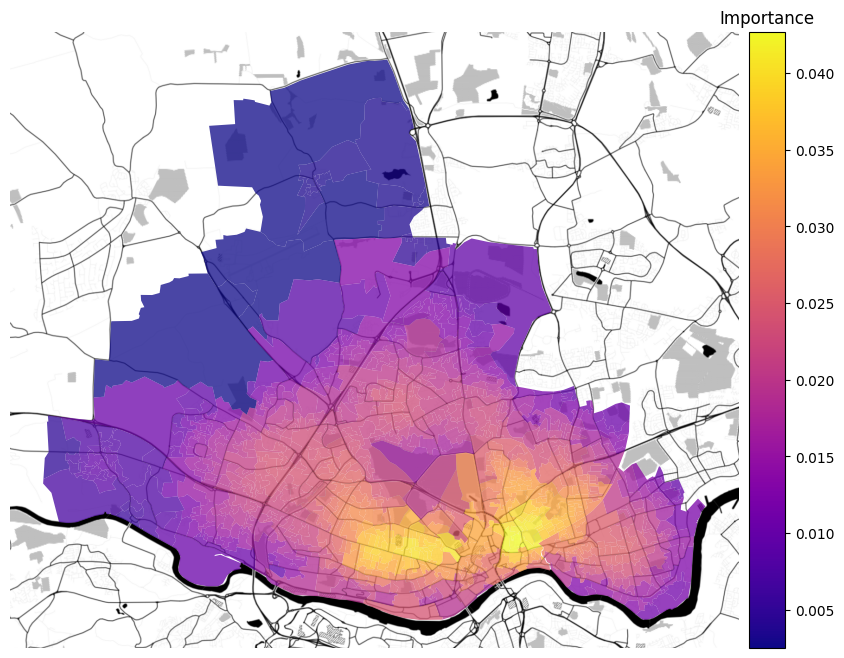

In [14]:
objs = CombinedObjectives(la, [Column(total.name, "total")], cov)
plot_oa_importance(objs, figsize=(10, 10), vmax=vmax)

## Children

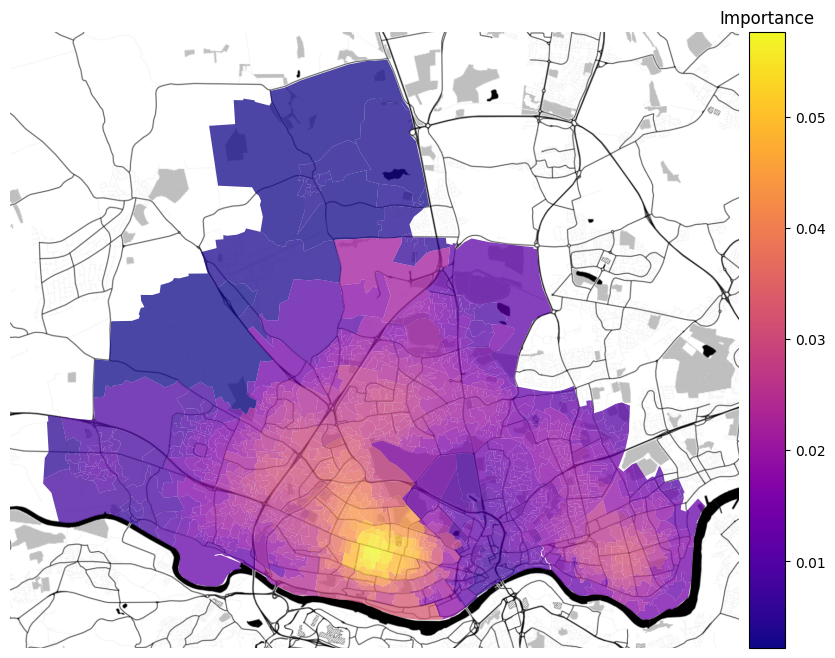

In [15]:
objs = CombinedObjectives(la, [Column(child.name, "total")], cov)
plot_oa_importance(objs, figsize=(10, 10), vmax=vmax)

## Older Adults

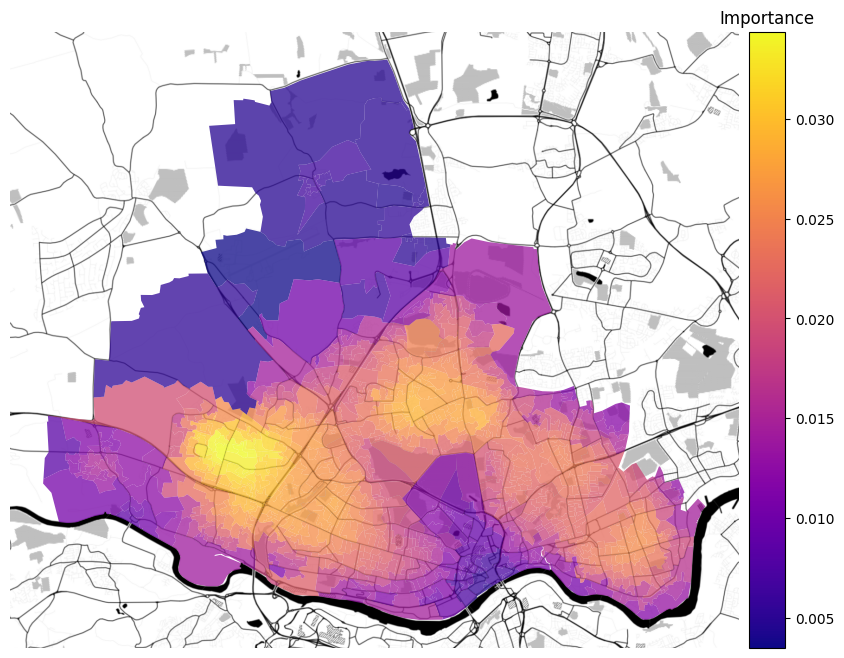

In [16]:
objs = CombinedObjectives(la, [Column(elder.name, "total")], cov)
plot_oa_importance(objs, figsize=(10, 10), vmax=vmax)

## Workers

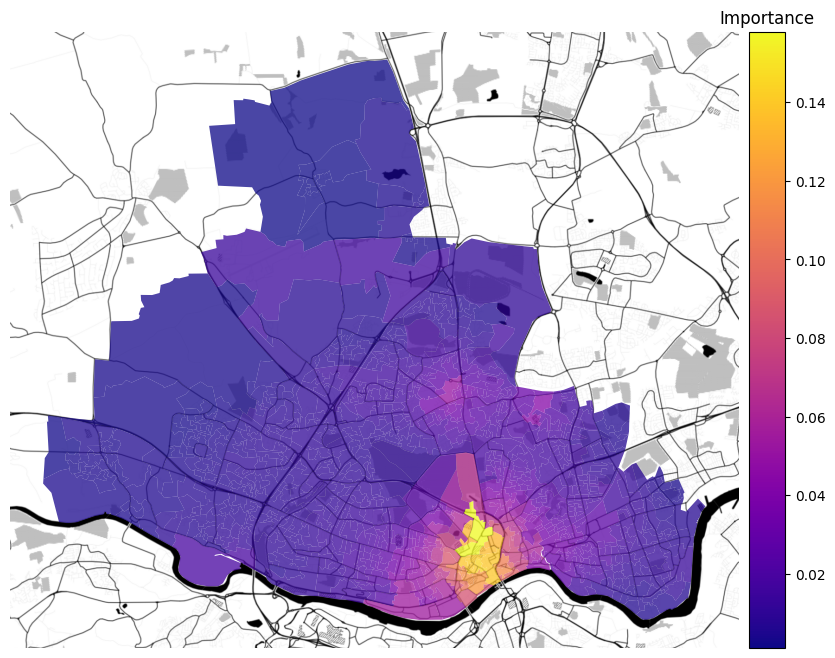

In [18]:
objs = CombinedObjectives(la, [Column(work.name, "workers")], cov)
plot_oa_importance(objs, figsize=(10, 10), vmax=vmax)